<a href="https://colab.research.google.com/github/Miguel-Lock/tutoring/blob/main/Miguel_Python_2_DataSci_files_and_conditionals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 2 — Working with Files & Conditionals (10 ⭕️s)

_Course:_ Intro to Data Science · _Runtime:_ Python 3 · _Kernel:_ IPykernel


## Overview



**What you’ll learn/review on this notebook**
1. File handling
2. Reading and writing CSV files with the `csv` module
3. List comprehension (`enumerate`, `zip`, & `assert`)
4. Control flow (conditionals, loops)
3. More plotting basics.

**Deliverables**
1. Produce a **PDF** from this notebook and upload to Canvas
2. **PNG**: a scatter plot saved as `lastname_nb2.png` (see Exit Ticket)


## Task 1 — Files, Folders, and CSV I/O
In this task you will create a **data/** folder, write a tiny CSV, read it back in two ways, and do a quick sanity check.


In [ ]:
# Paths and folder setup with pathlib
from pathlib import Path
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)
print("data/ exists?", data_dir.exists())

# Create a small example CSV
csv_path = data_dir / "example_xyz.csv"
csv_path.touch()
print("CSV target:", csv_path)

print("CSV exists?", csv_path.exists())

data/ exists? True
CSV target: data/example_xyz.csv
CSV exists? True


In [ ]:
# Write a CSV with three numeric columns: x, y, z
import csv, math, random
from decimal import Decimal

random.seed(0)
with csv_path.open("w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["x", "y", "z"])  # header
    for i in range(50):
        x = i / 10.0
        y = math.sin(x) + 0.1 * random.uniform(-1, 1)
        z = x**2
        writer.writerow([x, y, z])

print("Wrote:", csv_path, "size=", csv_path.stat().st_size, "bytes")


Wrote: data/example_xyz.csv size= 2460 bytes


In [ ]:
# Reading CSV (method 1): csv.reader -> lists
rows = []
with csv_path.open("r", newline="") as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        rows.append(row)

print("Header:", header)
print("First 3 rows:", rows[:3])
print("Total rows (not counting header):", len(rows))

assert len(rows) == 50, 'Problem encoutered: .csv file should contain 50 rows'


Header: ['x', 'y', 'z']
First 3 rows: [['0.0', '0.06888437030500963', '0'], ['0.1', '0.15142429723488865', '0.2000000000000000111022302463'], ['0.2', '0.18278364696123023', '0.4000000000000000222044604925']]
Total rows (not counting header): 50


In [ ]:
# Reading CSV (method 2): csv.DictReader -> dicts
records = []
with csv_path.open("r", newline="") as f:
    reader = csv.DictReader(f)
    for rec in reader:
        # convert strings to floats where appropriate
        rec["x"] = float(rec["x"]) if rec["x"] != "" else None
        rec["y"] = float(rec["y"]) if rec["y"] != "" else None
        rec["z"] = float(rec["z"]) if rec["z"] != "" else None
        records.append(rec)

print("First 3 records:")
for r in records[:3]:
    print(r)
print("Total records:", len(records))


First 3 records:
{'x': 0.0, 'y': 0.06888437030500963, 'z': 0.0}
{'x': 0.1, 'y': 0.15142429723488865, 'z': 0.010000000000000002}
{'x': 0.2, 'y': 0.18278364696123023, 'z': 0.04000000000000001}
Total records: 50


**Practice:**
1. Change the code above to add a third column `z = x**2` and re-run.
2. Re-read the CSV and verify the new column is present.
3. Add a quick check with `assert` that there are **exactly 50** data rows.

**Tip:** `assert condition, "message"` — if `condition` is `False`, you'll see the message.


## Task 2 — Conditionals, Loops & Common Errors
Write small snippets with `if/elif/else`, `for` and `while`, and use `enumerate`, `zip`, and list comprehensions.


In [ ]:
import sys

def is_even(number):
  if number % 2 == 0: return 1
  else: return 0

# Conditionals and comparisons
a, b = 5, 3
if a > b: relation = "greater"
elif a == b: relation = "equal"
else: relation = "less"
print(f"a is {relation} than b")

my_result = is_even(a - b)
if my_result: print('a - b is even')
else: print('a - b is odd (just like me 🤪)')

# List comprehension + zip + enumerate
nums = list(range(5))
squares = [n*n for n in nums]
pairs = list(zip(nums, squares))
for idx, (n, s) in enumerate(pairs):
    print(f"{idx}: {n}^2 = {s}")


# List Comprehension
square_pairs = [x for x in pairs if is_even(x[0])]
print('even square pairs:', square_pairs)


#enumerate
print('indices of those even squares:')
for (index, value) in enumerate(square_pairs): print(index, end=" ")


# A tiny assert check
assert len(nums) == 5, "nums should have 5 elements"



i = input('Enter an integer: ')

if i.isdigit(): i = int(i)
else:
    print('Not an integer. Terminating program')
    sys.exit()

if i > 5:
  print('Greater than 5')
  print('countdown to 5:')
  while i > 5:
    print(i, end=', ')
    i -= 1
  print('5')
elif i < 5: print('Less than 5')
elif i == 5: print('Equal to 5')






a is greater than b
a - b is even
0: 0^2 = 0
1: 1^2 = 1
2: 2^2 = 4
3: 3^2 = 9
4: 4^2 = 16
even square pairs: [(0, 0), (2, 4), (4, 16)]
indices of those even squares:
0 1 2 Enter an integer: 90
Greater than 5
countdown to 5:
90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5


In [ ]:
# While vs for — use while carefully to avoid infinite loops
count = 0
while count < 3:
    print("while loop count:", count)
    count += 1

for i in range(3):
    print("for loop i:", i)

# Common errors tip:
# - IndentationError: check spaces/tabs; use 4-space indents
# - NameError: variable not defined yet; run cells in order
# - TypeError: mixing types (e.g., adding str + int); convert with str() or int()


while loop count: 0
while loop count: 1
while loop count: 2
for loop i: 0
for loop i: 1
for loop i: 2


**Practice:**
1. Modify the `relation` logic to also print whether `a - b` is even or odd.
2. Build a list of only the **even** squares from `squares` using a list comprehension.
3. Use `enumerate` to print indices of those even squares.


## Task 3 — Plotting Refresher & Saving Figures
Make a quick line and histogram for practice, then complete the **Delivarable** (scatter plot from CSV).


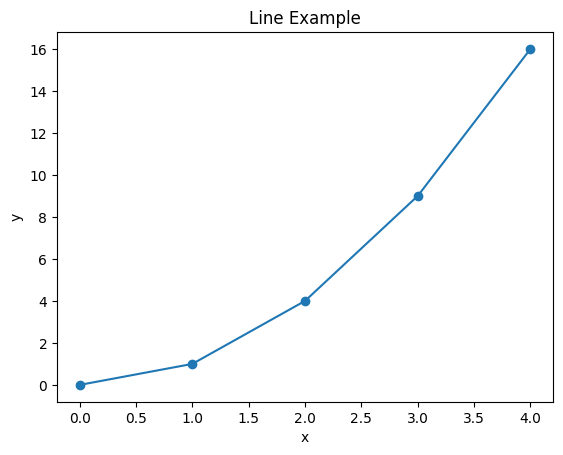

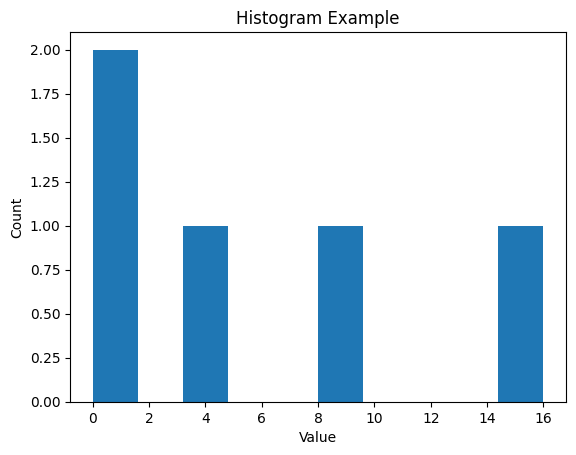

In [ ]:
import matplotlib.pyplot as plt

# Simple line
xs = [0, 1, 2, 3, 4]
ys = [0, 1, 4, 9, 16]
plt.figure()
plt.plot(xs, ys, marker='o', linestyle='-')  # no explicit color
plt.title("Line Example")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Simple histogram
plt.figure()
plt.hist(squares)
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()



## 🚩 Deliverable — Scatter Plot from CSV
- ✅Create a new CSV file with fake data for x & y values as before.
  - ✅X values should go in increments of 2 from 0 to 20.
  - ✅Y values should be random values between 0 and 200
- ✅Add a third column labeled z and make the values a linear function of y.

⭕️⭕️

- ✅Read in your new csv file to make a scatter plot

Create a **scatter plot** from the CSV file. Include:
- ✅Title, x/y labels, and a legend

⭕️⭕️

- ✅add a second series (z vs x) on the same plot and add a relevant legend to the plot

⭕️⭕️

- ✅Use distinct **marker** styles

⭕️

- ✅ **Show** the plot on this notebook and add a caption on a text markdown cell under the plot

⭕️

- ✅Consult the matplotlib styles reference guide [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html):  and change the style of your plot to a style of your choice.

⭕️

- ✅Save using the filename convention below.

⭕️

**Filename:** `lastname_nb2.png`  



Wrote: lock_nb2.csv size= 132 bytes
Header: ['x', 'y', 'z']
First 3 rows: [['0', '98', '73.5'], ['2', '194', '145.5'], ['4', '107', '80.25']]
Total rows (not counting header): 10


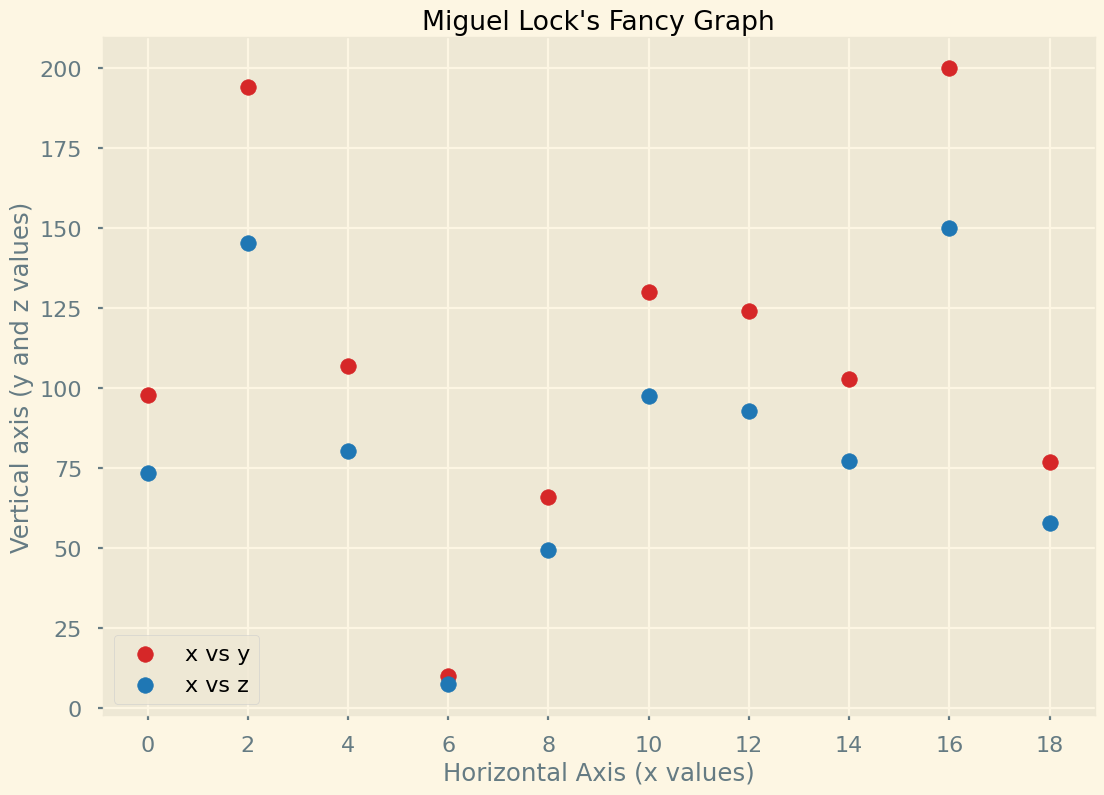

In [ ]:
from pathlib import Path
import csv, math, random
import matplotlib.pyplot as plt
import numpy as np


# Create a small example CSV
csv_path = Path("lock_nb2.csv")
csv_path.touch()

# Write a CSV with three numeric columns: x, y, z
random.seed(0)
with csv_path.open("w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["x", "y", "z"])  # header
    for i in range(10):
        x = i * 2
        y = random.randint(0, 200)
        z = y * 3 / 4
        writer.writerow([x, y, z])

print("Wrote:", csv_path, "size=", csv_path.stat().st_size, "bytes")




rows = []
with csv_path.open("r", newline="") as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        rows.append(row)

print("Header:", header)
print("First 3 rows:", rows[:3])
print("Total rows (not counting header):", len(rows))

assert len(rows) == 10, 'Problem encoutered: .csv file should contain 10 rows'

plt.figure()

rows = np.array(rows)
x = rows[:,0].astype(float)
y = rows[:,1].astype(float)
z = rows[:,2].astype(float)


plt.scatter(x, y, color='tab:red')
plt.title("Quadratic Growth Scattered")
plt.xlabel("Horizontal Axis (x values)")
plt.xticks(np.arange(0, 20, 2))
plt.ylabel("Vertical axis (y and z values)")
plt.title("Miguel Lock's Fancy Graph")

plt.scatter(x, z, color='tab:blue')

plt.legend(['x vs y', 'x vs z'])



plt.style.use('seaborn-v0_8-poster')
plt.savefig('lock_nb2.png')
plt.show()




## Plot explanation:

This plot is a bunch of random data points.

Horizontally, we see the x values, at intervals of 2

The blue data points are random integers between 0 and 200

The red data points are 3/4 the vertical value of each corresponding blue data point.


### Submission Checklist
- [x] Scatter saved as **`lastname_nb2.png`
- [x] Figure has **title**, **x/y labels**, and **legend**
- [x] Added a **2–3 sentence caption** in a Markdown cell
- [x] Uploaded **PNG** and **PDF/HTML** of the notebook to Canvas
